## INSTALAR LIBRERIAS NECESARIAS E IMPORTARLAS 

In [ ]:
#instalar librerias necesarias
pip install pandas
pip install google-cloud-bigquery
pip install db-dtypes
pip install seaborn
pip install matplotlib
pip install scikit-learn
pip install sklearn
pip install tabulate

In [136]:
import pandas as pd
from google.cloud import bigquery
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#expresiones regulares
import re

## Importar archivos de BigQuery (GCP)

In [1]:
def importar_tabla_bigquery (id_proyecto, tabla, name_dataframe): 

    client = bigquery.Client(project=id_proyecto)

    #consulta a la tabla
    query = f"SELECT * FROM `{tabla}`"

    #ejecutar la consulta
    dataframe = client.query(query).to_dataframe()

    #cambiar nombre al dataframe 
    globals()[name_dataframe] = dataframe


In [3]:
#COMPLETAR CON LOS DATOS DE LA TABLA QUE SE QUIERE IMPORTAR 
id_proyecto="tfg-ayudasaludmental-12345"
tabla_importar= "DatosTech.datos_tech_load_2014"
name_dataframe= "datos_tech_load"

importar_tabla_bigquery(id_proyecto,tabla_importar,name_dataframe)

## Analisis inicial del dataset

In [86]:
#crearse dataset igual para modificarlo
datos_tech = datos_tech_load.copy()


In [4]:
#FUNCION CAMBIAR NOMBRES A LAS COLUMNAS

def cambiar_nombres_columnas(dataframe,nuevos_nombres):

    #nombres columnas
    nombres_actuales = dataframe.columns.tolist()


    #comprobar si los nuevos nombres coinciden con el numero de columnas del dataframe
    if len(nuevos_nombres) == len(nombres_actuales):
        #cambiar los nombres
        dataframe.columns = nuevos_nombres
        print("Cambiado correctamente")
    else:
        print("No coincide numero de columnas")

    return dataframe


In [87]:
#APLICAR FUNCION EN LOS DATAFRAMES QUE SE QUIERA

nuevos_nombres = [
    "fecha",
    "edad",
    "genero",
    "pais",
    "estado_res",
    "autonomo",
    "antecedentes_familiares",
    "tratamiento",
    "interferencia",
    "num_empleados",
    "trabajo_remoto",
    "emp_tech",
    "beneficios",
    "opciones",
    "discusion_programa",
    "recursos",
    "anonimato",
    "facilidad_licencia",
    "consecuencias_negativas_mental_emp",
    "consecuencias_negativas_fisica_emp",
    "discusion_comp",
    "discusion_supervisor",
    "mencion_entrevista_mental",
    "mencion_entrevista_fisica",
    "prioridad_salud",
    "consecuencias_negativas_comp_trabajo",
    "comentarios"
]

cambiar_nombres_columnas(datos_tech, nuevos_nombres)

Cambiado correctamente


,fecha,edad,genero,pais,estado_res,autonomo,antecedentes_familiares,tratamiento,interferencia,num_empleados,...,facilidad_licencia,consecuencias_negativas_mental_emp,consecuencias_negativas_fisica_emp,discusion_comp,discusion_supervisor,mencion_entrevista_mental,mencion_entrevista_fisica,prioridad_salud,consecuencias_negativas_comp_trabajo,comentarios
0,2014-08-27 11:29:44,32,Male,Canada,nan,nan,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,nan
1,2014-08-27 11:32:05,39,M,Canada,nan,nan,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,nan
2,2014-08-27 11:35:08,36,Male,France,nan,Yes,Yes,No,nan,6-25,...,Somewhat easy,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No,nan
3,2014-08-27 11:35:24,31,male,United States,NC,Yes,No,No,Never,1-5,...,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No,nan
4,2014-08-27 11:41:18,27,Male,United States,NY,No,No,Yes,Rarely,6-25,...,Very easy,No,No,Yes,Yes,Maybe,Maybe,Don't know,No,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,2015-02-21 11:55:47,23,Male,United Kingdom,nan,No,No,No,Never,26-100,...,Somewhat easy,Maybe,No,Some of them,Some of them,No,Maybe,Yes,Yes,Although my employer does everything they can ...
1256,2015-02-24 10:32:32,60,Male,United States,CA,No,No,Yes,Often,More than 1000,...,Somewhat easy,Maybe,Maybe,Some of them,No,No,Maybe,Don't know,No,nan
1257,2015-04-04 11:22:06,30,male,Netherlands,nan,No,No,No,Sometimes,500-1000,...,Don't know,Maybe,No,Yes,Yes,Maybe,Yes,Don't know,No,nan
1258,2015-04-23 14:03:52,28,Male,Ireland,nan,No,No,Yes,Rarely,26-100,...,Don't know,Maybe,No,No,No,No,Maybe,Don't know,No,nan


In [36]:
#analisis inicial de los datos 
#mostrar primeras filas del dataframe
print("primeras filas")
print(datos_tech.head())

#infomacion basica del dataframe
print("\ninformacion")
print(datos_tech.info())

#estadisticas de cada columna
print("\nestadisticas")
print(datos_tech.describe())

#dimensiones del dataframe
print("\ndimensiones")
print(datos_tech.shape)

#mostrar tipos de datos
print("\ntipos de datos")
print(datos_tech.dtypes)



primeras filas
                fecha  edad genero           pais estado_res autonomo  \
0 2014-08-27 11:29:44    32   Male         Canada        nan      nan   
1 2014-08-27 11:32:05    39      M         Canada        nan      nan   
2 2014-08-27 11:35:08    36   Male         France        nan      Yes   
3 2014-08-27 11:35:24    31   male  United States         NC      Yes   
4 2014-08-27 11:41:18    27   Male  United States         NY       No   

  antecedentes_familiares tratamiento interferencia num_empleados  ...  \
0                      No          No        Rarely          6-25  ...   
1                      No          No         Never           1-5  ...   
2                     Yes          No           nan          6-25  ...   
3                      No          No         Never           1-5  ...   
4                      No         Yes        Rarely          6-25  ...   

   facilidad_licencia consecuencias_negativas_mental_emp  \
0  Somewhat difficult                    

In [37]:
def valores_unicos(dataframe):
    for columna in dataframe.columns:
        valores_unicos = dataframe[columna].unique()
        print(f"Valores únicos en la columna {columna}:")
        print(valores_unicos)
        print()

valores_unicos(datos_tech)

Valores únicos en la columna fecha:
['2014-08-27T11:29:44.000000000' '2014-08-27T11:32:05.000000000'
 '2014-08-27T11:35:08.000000000' ... '2015-04-04T11:22:06.000000000'
 '2015-04-23T14:03:52.000000000' '2015-08-25T19:59:38.000000000']

Valores únicos en la columna edad:
[         32          39          36          31          27          34
          26          28          23          38          30          40
          18          33          35          21          29          42
          45          25          24          54          22          50
          43          37          51          41          11          46
         -29          56          60          55          47          20
          49          19           5          44 99999999999       -1726
          48          61          57           8          -1          65
         329          58          62          53          72]

Valores únicos en la columna genero:
['Male' 'M' 'male' 'm' 'Female' 'F' 'Woman' 

## Preparación dataframe

Todas las columnas son objetc, cambiar a datatime, int y string 

In [38]:
#CAMBIAR TIPOS DE COLUMNAS A BOOLEANAS
def cambiar_columnas_bool(dataframe):
    dataframe["fecha"] = pd.to_datetime(dataframe["fecha"])
    dataframe["edad"] = dataframe["edad"].astype(int)
    #dataframe["autonomo"] = dataframe["autonomo"].astype(bool)
    #dataframe["antecedentes"] = dataframe["antecedentes"].astype(bool)
    #dataframe["tratamiento"] = dataframe["tratamiento"].astype(bool)
    #dataframe["interferencia"] = dataframe["interferencia"].astype(bool)
    #dataframe["trabajo_remoto"] = dataframe["trabajo_remoto"].astype(bool)
    #dataframe["emp_tech"] = dataframe["emp_tech"].astype(bool)
    #dataframe["beneficios"] = dataframe["beneficios"].astype(bool)
    #dataframe["discusion_programa"] = dataframe["discusion_programa"].astype(bool)
    #dataframe["anonimato"] = dataframe["anonimato"].astype(bool)
    #dataframe["prioridad_salud"] = dataframe["prioridad_salud"].astype(bool)
    #dataframe["mencion_entrevista_mental"] = dataframe["mencion_entrevista_mental"].astype(bool)
    #dataframe["mencion_entrevista_fisica"] = dataframe["mencion_entrevista_fisica"].astype(bool)
    return dataframe

#CAMBIAR TIPOS A STRING MENOS EDAD Y FECHA
def cambiar_columnas_string(dataframe):
    columnas = dataframe.columns.tolist()

    dataframe["fecha"] = pd.to_datetime(dataframe["fecha"])
    dataframe["edad"] = dataframe["edad"].astype(int)

    #quitar columnas edad y fecha
    columnas_cambiar = [col for col in columnas if col not in ["fecha", "edad"]]

    #convertir las columnas a string 
    dataframe[columnas_cambiar] = dataframe[columnas_cambiar].astype(str)

    return dataframe


In [88]:
#datos_tech = cambiar_columnas_bool(datos_tech_2014)
datos_tech = cambiar_columnas_string(datos_tech)

print(datos_tech.dtypes)

fecha                                   datetime64[ns]
edad                                             int64
genero                                          object
pais                                            object
estado_res                                      object
autonomo                                        object
antecedentes_familiares                         object
tratamiento                                     object
interferencia                                   object
num_empleados                                   object
trabajo_remoto                                  object
emp_tech                                        object
beneficios                                      object
opciones                                        object
discusion_programa                              object
recursos                                        object
anonimato                                       object
facilidad_licencia                              object
consecuenc

Comprobar si hay datos duplicados (eliminarlos si hay)

In [17]:
#CREAR FUNCION PARA ELIMINAR DUPLICADOS
def eliminar_duplicados(df):
   
    duplicados = df.duplicated().any()
    print("datos duplicados", duplicados)
    print("tamaño  inicial", len(df))

    df_sin_duplicados = df.drop_duplicates()
    print("tamaño sin duplicados", len(df_sin_duplicados))

    return df_sin_duplicados


In [18]:
#APLICAR FUNCION
datos_tech = eliminar_duplicados(datos_tech)

datos duplicados False
tamaño  inicial 1260
tamaño sin duplicados 1260


Comprobar si hay valores null y nan y eliminarlos

In [89]:
#Los valores np.NaN estan como "nan", sustituirlos
#los valores nulos estan como nan por lo que hay que convertilos a np.nan para que los reconcozca
datos_tech = datos_tech.replace(['', 'nan'], np.nan)


In [73]:
#ver que columnas tienen valores faltantes
def columnas_nulos(df):
    #contar nulos por columna
    nulos_columna = df.isnull().sum()
    #columnas que tienen nulo
    columnas_nulos = df.columns[df.isnull().any()].tolist()
    print(columnas_nulos)

    #ver cuantos nulos hay en cada columna
    for columna in columnas_nulos:
        cantidad_nulos = nulos_columna[columna]
        print(f"'{columna}': {cantidad_nulos}")

    return columnas_nulos

#aplicar funcion
columnas_nulos = columnas_nulos(datos_tech)

['estado_res', 'autonomo', 'interferencia', 'notas']
'estado_res': 516
'autonomo': 18
'interferencia': 264
'notas': 1096


In [90]:
#FUNCION PARA ELIMINAR NULOS

def eliminar_nulos(df):
   
    nulos = df.isnull().any().any()
    print("nulos", nulos)
    print("tamaño inicial:", len(df))

    df_sin_nulos = df.dropna()
    print("tamaño sin nulos:", len(df_sin_nulos))

    return df_sin_nulos

#APLICAR FUNCION
#datos_tech = eliminar_nulos(datos_tech)

In [91]:
#FUNCION CONTAR VALORES DE CADA VALOS UNICO Y PORCENTAJE SOBRE EL TOTAL
def contar_valores_columna(df, columna):
    
    conteo_valores = df[columna].value_counts(dropna=False).reset_index()
    conteo_valores.columns = ["valor_unico", "numero"]
    conteo_valores["porcentaje"] = conteo_valores["numero"] / len(df) * 100
    return conteo_valores



TRATAR COLUMNA AUTONOMO: Hay 18 filas sin "autonomo"

In [92]:
#ver cuantos valores hay de cada 
print(contar_valores_columna(datos_tech_load, "autonomo"))

  valor_unico  numero  porcentaje
0          No    1096   86.984127
1         Yes     146   11.587302
2         nan      18    1.428571


In [93]:
#como el valor mas comun es "no", se aplicara el metodo imputacion de moda (coger el valor mas comun)

#FUNCION PARA SUSTITUIR NAN POR MODA
def sustituir_moda(df, columna):
    moda = df[columna].mode().iloc[0]
    df[columna] = df[columna].fillna(moda)
    return df

#aplicar funcion
datos_tech_limpio = sustituir_moda(datos_tech, "autonomo")
print(contar_valores_columna(datos_tech_limpio, "autonomo"))

  valor_unico  numero  porcentaje
0          No    1114   88.412698
1         Yes     146   11.587302


TRATAR COLUMNA INTERFERENCIA: Hay 264 filas sin "interferencia"

In [94]:
#ver cuantos valores hay de cada 
print(contar_valores_columna(datos_tech_limpio, "interferencia"))

  valor_unico  numero  porcentaje
0   Sometimes     466   36.984127
1         NaN     264   20.952381
2       Never     213   16.904762
3      Rarely     173   13.730159
4       Often     144   11.428571


In [95]:
#sustituir por la moda
datos_tech_limpio = sustituir_moda(datos_tech_limpio, "interferencia")
print(contar_valores_columna(datos_tech_limpio, "interferencia"))


  valor_unico  numero  porcentaje
0   Sometimes     730   57.936508
1       Never     213   16.904762
2      Rarely     173   13.730159
3       Often     144   11.428571


TRATAR COLUMNA ESTADO_RES: Hay 516 filas sin "estado res", ya que no son de Estados Unidos

In [96]:
#ver cuantos valores hay de cada 
print(contar_valores_columna(datos_tech_limpio, "estado_res"))

   valor_unico  numero  porcentaje
0          NaN     516   40.952381
1           CA     138   10.952381
2           WA      70    5.555556
3           NY      57    4.523810
4           TN      45    3.571429
5           TX      44    3.492063
6           OH      30    2.380952
7           IL      29    2.301587
8           PA      29    2.301587
9           OR      29    2.301587
10          IN      27    2.142857
11          MI      22    1.746032
12          MN      21    1.666667
13          MA      20    1.587302
14          FL      15    1.190476
15          NC      14    1.111111
16          VA      14    1.111111
17          MO      12    0.952381
18          GA      12    0.952381
19          WI      12    0.952381
20          UT      11    0.873016
21          CO       9    0.714286
22          AL       8    0.634921
23          MD       8    0.634921
24          AZ       7    0.555556
25          OK       6    0.476190
26          NJ       6    0.476190
27          KY      

In [97]:
#FUNCION PARA SUSTITUIR NAN POR MODA
def sustituir(df, columna):
    df[columna] = df[columna].fillna("Ninguno")
    return df

#aplicar funcion
datos_tech_limpio = sustituir(datos_tech_limpio, "estado_res")
print(contar_valores_columna(datos_tech_limpio, "estado_res"))

   valor_unico  numero  porcentaje
0      Ninguno     516   40.952381
1           CA     138   10.952381
2           WA      70    5.555556
3           NY      57    4.523810
4           TN      45    3.571429
5           TX      44    3.492063
6           OH      30    2.380952
7           IL      29    2.301587
8           PA      29    2.301587
9           OR      29    2.301587
10          IN      27    2.142857
11          MI      22    1.746032
12          MN      21    1.666667
13          MA      20    1.587302
14          FL      15    1.190476
15          NC      14    1.111111
16          VA      14    1.111111
17          MO      12    0.952381
18          GA      12    0.952381
19          WI      12    0.952381
20          UT      11    0.873016
21          CO       9    0.714286
22          AL       8    0.634921
23          MD       8    0.634921
24          AZ       7    0.555556
25          OK       6    0.476190
26          NJ       6    0.476190
27          KY      

Ya que los datos ya vienen anonimizados, ponerle un id a cada usuario por si lo necesito mas adelante

In [98]:
#añadir id a cada usuario
datos_tech_limpio["id_user"] = range(1, len(datos_tech_limpio) + 1)

TRATAR COLUMNA EDAD:
Hay algunas edades que se salen de lo normal: Sustituir las edades que sean mayores de 100 y menores de 0, como son pocas eliminarlas

In [99]:
#limpiar edades que sean menor que 18 y mayor de 100, quedarse solo las edades que cumplan 18<edad<100
#nombre columna "edad"

def limpiar_edades(df, columna_edades):
    filas_iniciales = len(df)

    df_limpiado = df.loc[(df[columna_edades] >= 18) & (df[columna_edades] <= 100)].copy()
    filas_eliminadas = filas_iniciales - len(df_limpiado)

    print("filas eliminadas", filas_eliminadas)

    return df_limpiado

#apllicar funcion
datos_tech_limpio = limpiar_edades(datos_tech_limpio, "edad")

filas eliminadas 8


TRATAR COLUMNA GENERO:
En la columna de genero hay valores que no son femenino, masculino por lo que lo agruparemos en otras (creo otra que los agrupa)

In [103]:
#limpiar columna gender
print(len(datos_tech_limpio["genero"].unique()))
print((datos_tech_limpio["genero"].unique()))

40
['male' 'm' 'female' 'f' 'woman' 'cis-female/femme' 'queer' 'malr'
 'something kinda male?' 'make' 'man' 'mail' 'maile' 'fluid' 'neuter'
 'femail' 'androgyne' 'male leaning androgynous' 'female (trans)'
 'male (cis)' 'nah' 'genderqueer' 'guy (-ish) ^_^' 'male ' 'cis male'
 'enby' 'female (cis)' 'female '
 'ostensibly male, unsure what that really means' 'mal' 'femake' 'agender'
 'cis man' 'male-ish' 'trans-female' 'cis female' 'queer/she/they'
 'non-binary' 'trans woman' 'msle']


In [105]:
#FUNCION PARA MODIFICAR COLUMNA GENERO Y CONVERTIR SOLO A VALORES "MASCULINO", "FEMENINO", "OTROS"


def agrupar_genero(df, columna):
    
    #convertir toda la columna de Genero a minuscula para agrupar 
    df[columna] = df[columna].str.lower()

    #funcion para asignar cad genero a un grupo
    def asignar_grupo(nombre):
        if nombre in ["male", "m", "make", "male ", "msle", "man", "cis male","cis man", "mal", "male (cis)"]:
            return "masculino"
        elif nombre in ["female", "f", "woman", "female ", "cis female", "femake","cis-female/femme"]:
            return "femenino"
        else:
            return "otro"

    #aplicar funcion 
    df["grupo_genero"] = df[columna].apply(asignar_grupo)

    #comporbar que solo hay tres grupos
    print(len(datos_tech_limpio["grupo_genero"].unique()))
    print((datos_tech_limpio["grupo_genero"].unique()))

    return df

#aplicar funcion
datos_tech_limpio = agrupar_genero(datos_tech_limpio, "genero")
print(contar_valores_columna(datos_tech_limpio, "grupo_genero"))


3
['masculino' 'femenino' 'otro']
  valor_unico  numero  porcentaje
0   masculino     983   78.514377
1    femenino     245   19.568690
2        otro      24    1.916933


In [115]:
print(contar_valores_columna(datos_tech_limpio, "antecedentes_familiares"))

  valor_unico  numero  porcentaje
0          No     763   60.942492
1         Yes     489   39.057508


In [116]:

print(contar_valores_columna(datos_tech_limpio, "genero"))

                                       valor_unico  numero  porcentaje
0                                             male     817   65.255591
1                                           female     183   14.616613
2                                                m     150   11.980831
3                                                f      53    4.233227
4                                             make       4    0.319489
5                                            woman       4    0.319489
6                                         cis male       3    0.239617
7                                            male        3    0.239617
8                                              man       2    0.159744
9                                   female (trans)       2    0.159744
10                                         female        2    0.159744
11                                      cis female       1    0.079872
12                                  queer/she/they       1    0.079872
13    

## CREAR COJUNTO PARA NUBE DE PALABRAS

In [138]:
#crearse dataset igual para modificarlo
nube_palabras = datos_tech_limpio.copy()

In [139]:
#eliminar todas las clumnas menos id_user y comnetarios
columnas = ["id_user", "comentarios"]
nube_palabras = nube_palabras.drop(columns=[col for col in nube_palabras.columns if col not in columnas])

In [140]:
#eliminar filas nan
nube_palabras = nube_palabras.dropna()

In [141]:
#separar columna de comentario por filas 

#eliminar caracteres especiales
nube_palabras["comentarios"] = nube_palabras["comentarios"].str.replace(r'[^\w\s]', '').str.lower()
    
#dividir en palabras
nube_palabras["comentarios"] = nube_palabras["comentarios"].str.split()

# Explorar las filas
nube_palabras = nube_palabras.explode("comentarios")
nube_palabras = nube_palabras.reset_index(drop=True)

/Users/luciaprietogonzalez/Documents/Universidad/CURSO4/TFG/TFG DEFINITIVO/DESARROLLO/TFG/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


## GRAFICAR DATOS

In [175]:
#VISUALIZAR DISTIBUCION DE EDADES DE LOS ENCUESTADOS
def visualizar_edad(df, columna):
    plt.figure()
    plt.hist(df[columna], bins=20, edgecolor='k')
    plt.xlabel("EDAD")
    plt.ylabel("FRECUENCIA")
    plt.title("DISTRIBUCIÓN DE EDADES")
    plt.show()


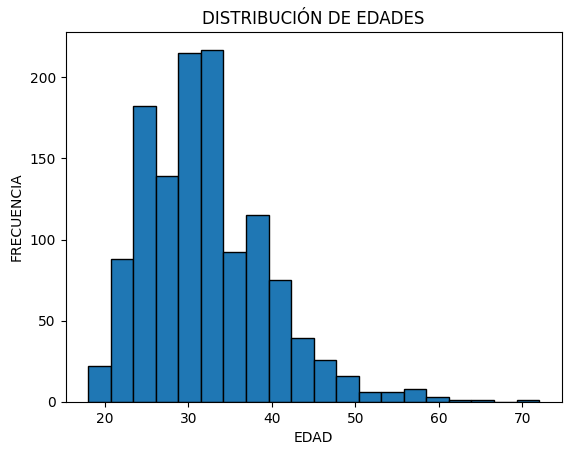

In [176]:
visualizar_edad(datos_tech_limpio, 'edad')

In [172]:
#funcion para crear graficos de lineas por agrupacion de valores
def visualizar_columnas(df,columnas):
    for columna in columnas:
        conteo_valores = df[columna].value_counts()
        plt.figure()
        plt.bar(conteo_valores.index, conteo_valores.values)
        plt.xlabel(columna)
        plt.ylabel("Cantidad de registros")
        plt.title(f'Numero de registros por - {columna}')
        plt.xticks(rotation=45)
        plt.show()


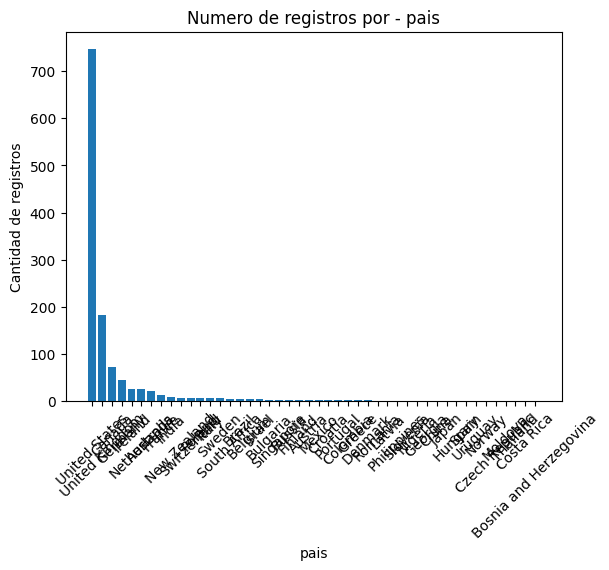

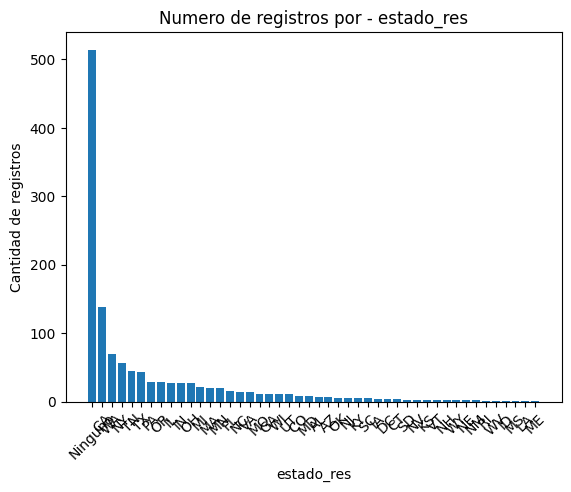

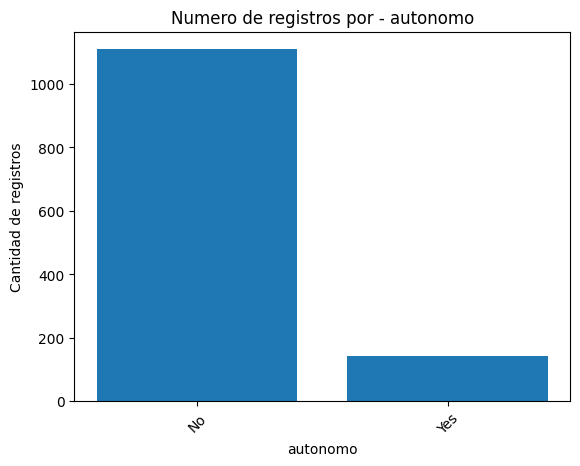

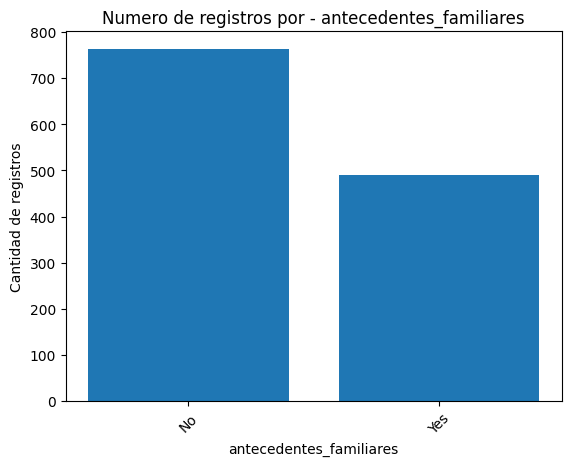

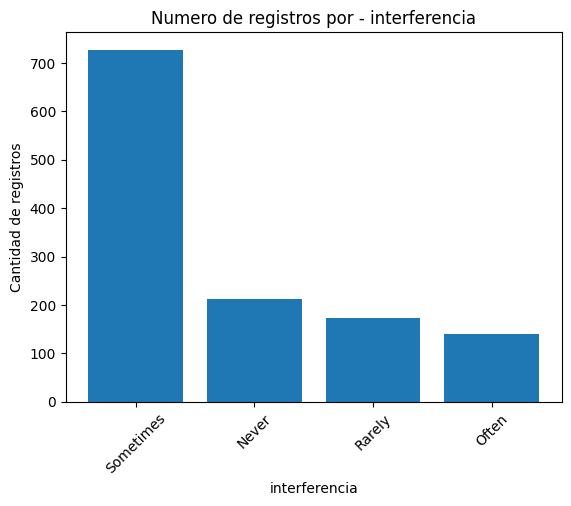

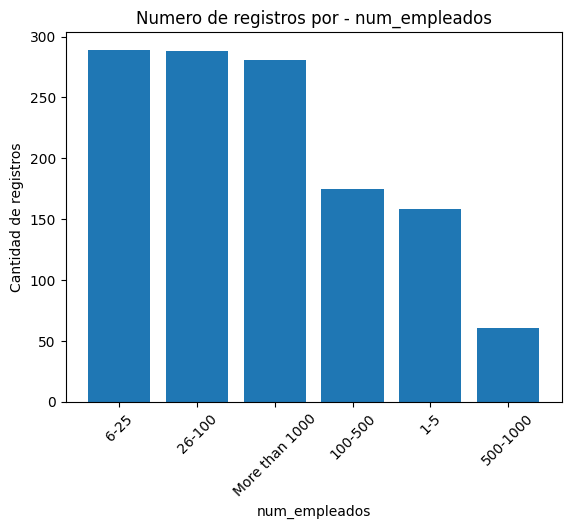

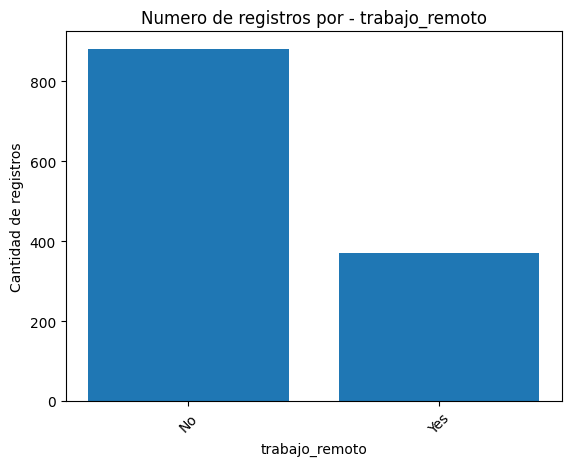

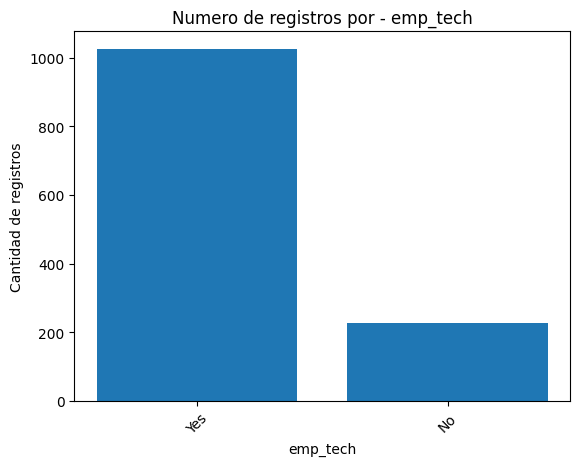

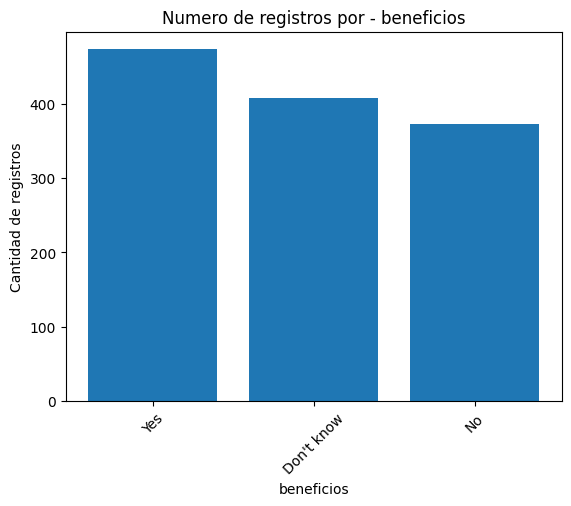

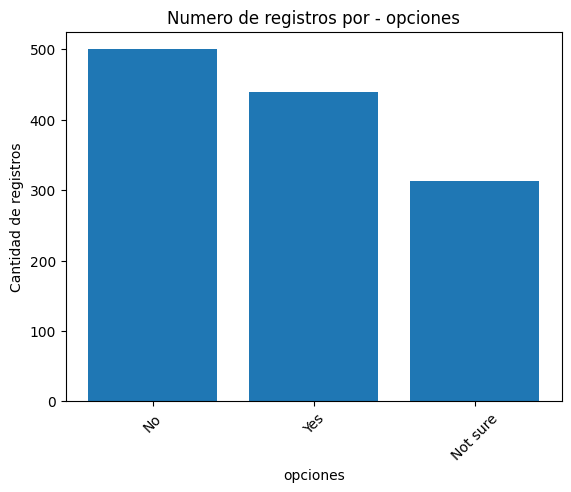

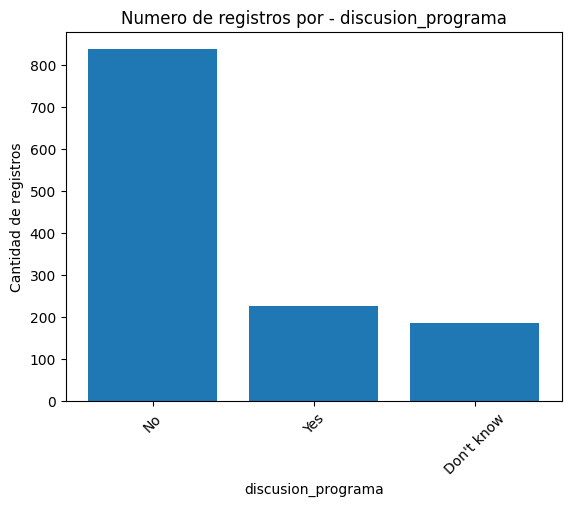

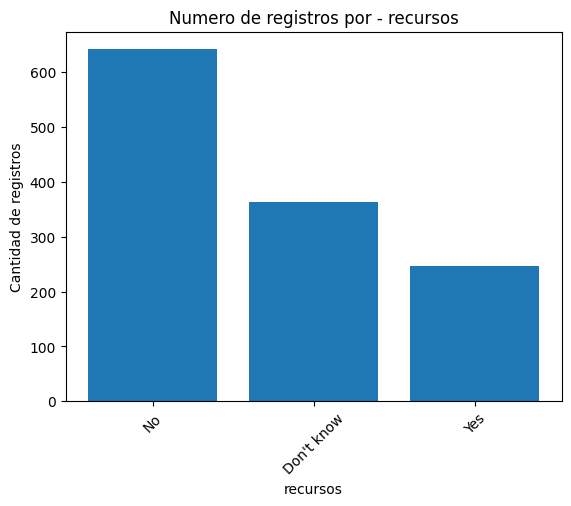

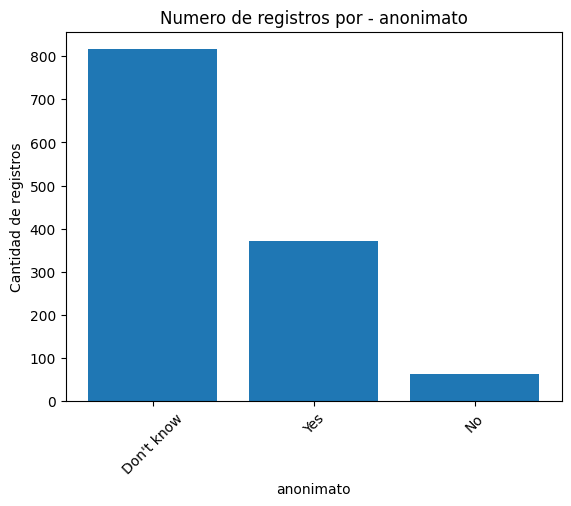

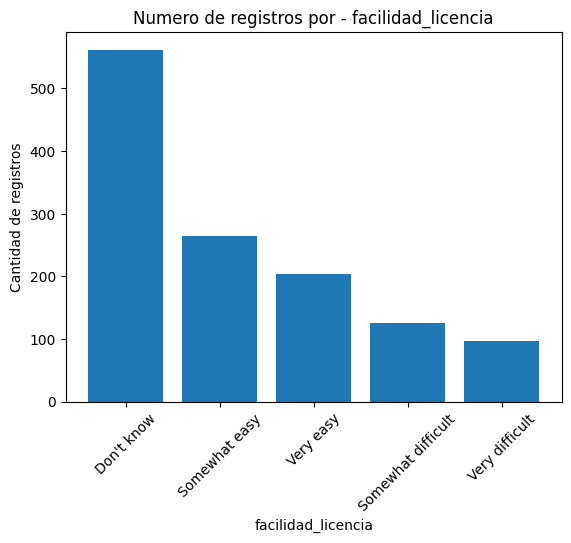

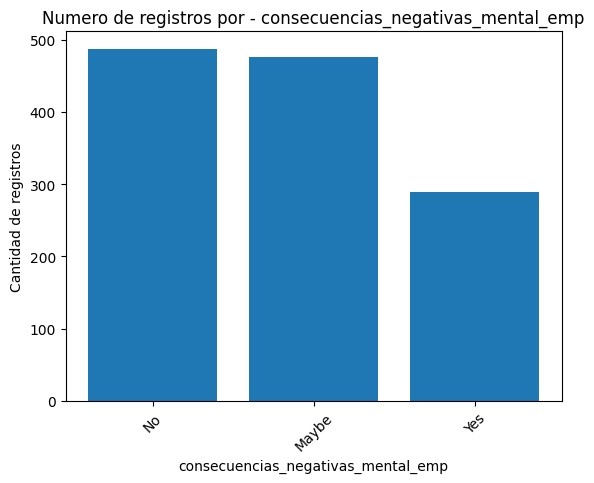

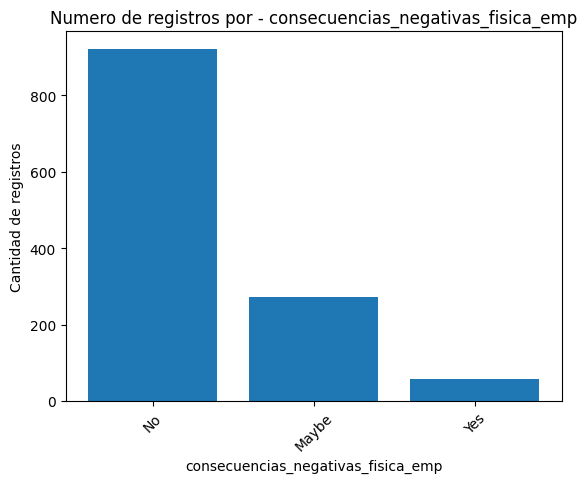

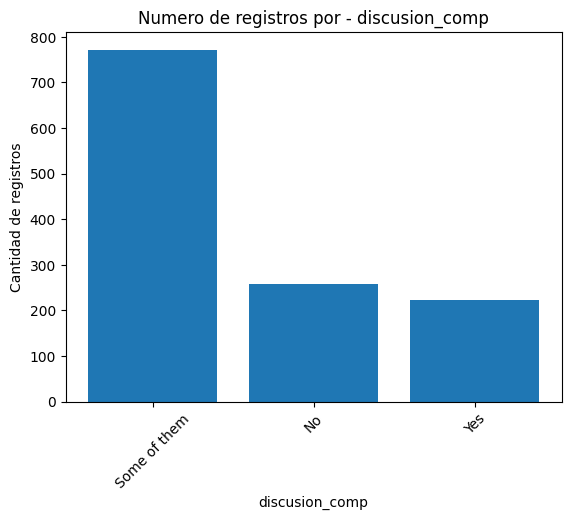

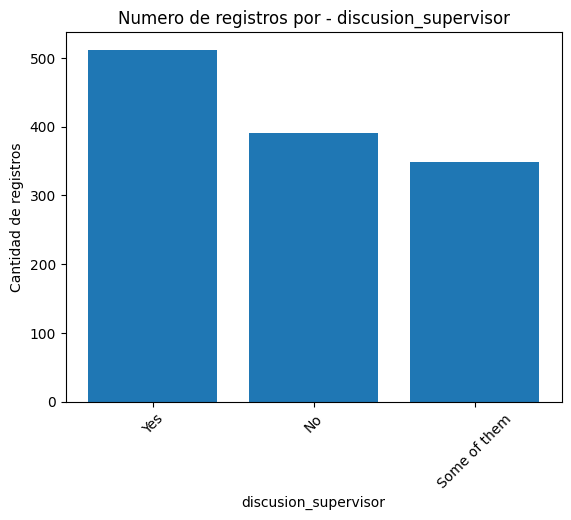

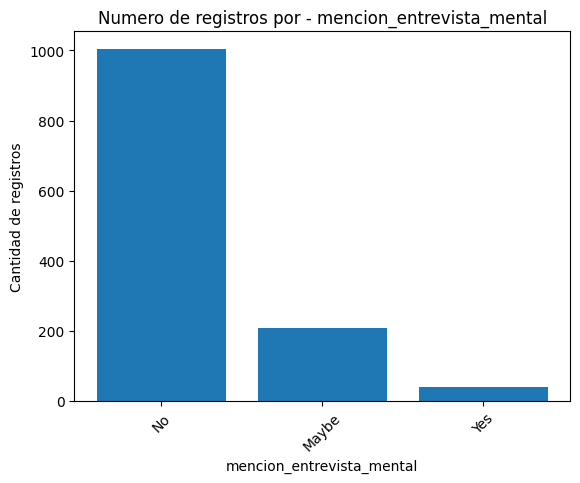

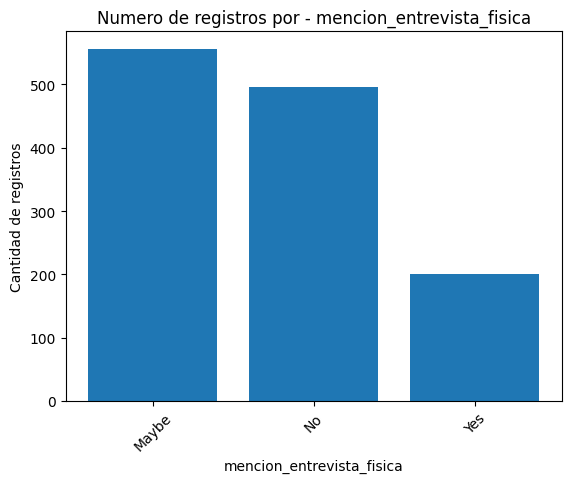

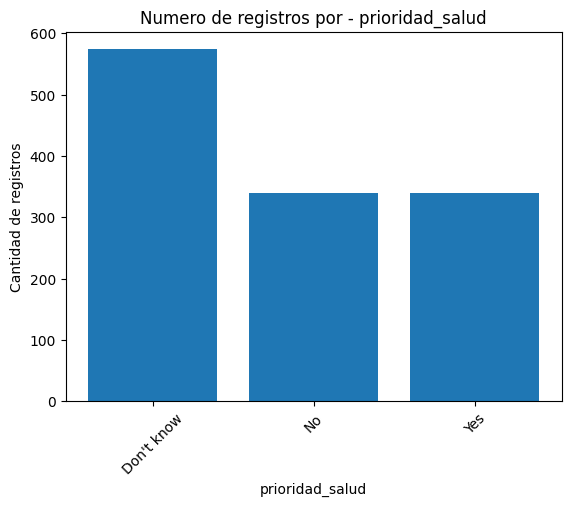

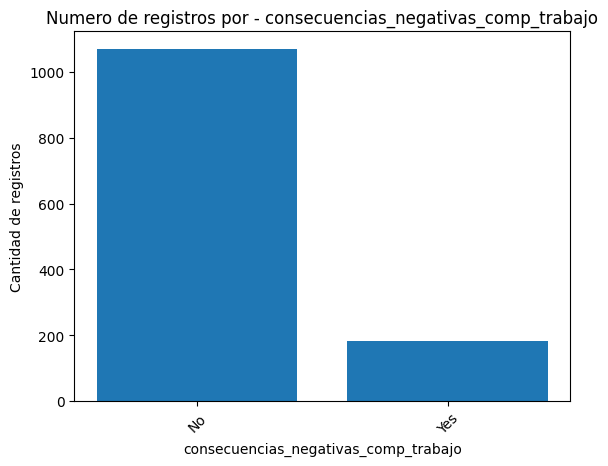

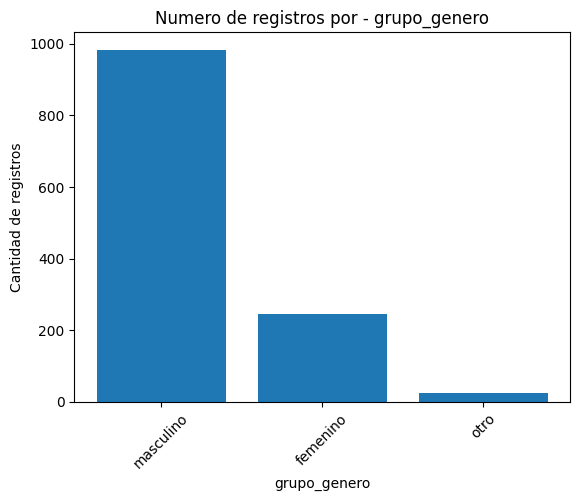

In [177]:
columnas =["pais", "estado_res", "autonomo", "antecedentes_familiares", "interferencia",
                   "num_empleados", "trabajo_remoto", "emp_tech", "beneficios", "opciones",
                   "discusion_programa", "recursos", "anonimato", "facilidad_licencia",
                   "consecuencias_negativas_mental_emp", "consecuencias_negativas_fisica_emp",
                   "discusion_comp", "discusion_supervisor", "mencion_entrevista_mental",
                   "mencion_entrevista_fisica", "prioridad_salud", "consecuencias_negativas_comp_trabajo",
                   "grupo_genero"]
visualizar_columnas(datos_tech_limpio,columnas)

In [26]:
#crear dataframre final procesado para subir
datos_tech_procesados = datos_tech.copy()

## Subir Tablas a BigQuery y crear vistas

[Cargar datos desde Dataframe a Biguery](https://cloud.google.com/bigquery/docs/samples/bigquery-load-table-dataframe?hl=es-419)



In [20]:
#CREAR DATASET SI NO EXISTE
#dataset_ref = client.dataset(dataset_id)

#dataset = bigquery.Dataset(dataset_ref)
#dataset.location = 'europe-west1'
#dataset = client.create_dataset(dataset)

In [155]:
#FUNCION PARA SUBIR DATAFRAME A BIGQUERY
def cargar_dataframe_bigquery (dataframe, dataset_id, table_name, table_id):
    client = bigquery.Client(project=id_proyecto)

    #verificar si la tabla ya existe 
    table_ref = client.dataset(dataset_id).table(table_name)
    table_exists = False
    try:
        table = client.get_table(table_ref)
        table_exists = True
    except Exception as e:
        pass

    #venirificar si el esquema de la tabla ha cambiado si existe
    if table_exists:
        table = client.get_table(table_ref)
        if set(dataframe.columns) != set([field.name for field in table.schema]):
            #si ha cambiado el esquema elimina la tabla
            print("Si ha cambiado el esquema")
            client.delete_table(table_ref)
            print("Se ha borrado correctamente")
        else: print("No ha cambiado")

    #si la tabla no existe crearla
    if not table_exists:
        schema = [bigquery.SchemaField(name, "STRING") for name in dataframe.columns]  # Ajusta el tipo de datos según tus necesidades
        table = bigquery.Table(table_ref, schema=schema)
        table = client.create_table(table)

    #subir dataframe a la tabla
    job_config = bigquery.LoadJobConfig()
    job_config.write_disposition = bigquery.WriteDisposition.WRITE_TRUNCATE  
    job = client.load_table_from_dataframe(dataframe, table_id, job_config=job_config)
    job.result()  

    print(f"Se ha cargado la tabla {table_id} correctamente")

In [111]:
#CREAR VISTA A PARTIR DE LA TABLA 

def crear_vista(id_proyecto, dataset, tabla, vista):
    client = bigquery.Client(project=id_proyecto)
    #consulta para crear la vista
    query = f"""
    CREATE OR REPLACE VIEW `{id_proyecto}.{dataset}.{vista}`
    AS
    SELECT *
    FROM `{id_proyecto}.{dataset}.{tabla}`
    """

    #ejecutar la consulta
    job = client.query(query)
    job.result() 

    print(f"{vista} creada correctamente")




In [23]:
#QUITARLE UNA COLUMNA A DATAFRAME PARA PROBAR SI FUNCIONA LA FUNCION
#datos_tech_procesados = datos_tech.drop(['comments'], axis= 1)

In [156]:
#COMPLETAR CON LOS DATOS DEL DATAFRAME Y LA TABLA 

#dataframe a subir
dataframe = datos_tech_limpio
#nombre dataset bigquery
dataset_id = "DatosTech"
#nombre tabla
table_name =  "datos_tech_procesados"
#nombre dataset mas tabla
table_id = "DatosTech.datos_tech_procesados"

#aplicar funcion
cargar_dataframe_bigquery(dataframe, dataset_id, table_name, table_id)


No ha cambiado
Se ha cargado la tabla DatosTech.datos_tech_procesados correctamente


In [159]:
#CREAR VISTA

#nombre dataset bigquery
dataset = "DatosTech"
#nombre tabla
tabla =  "datos_tech_procesados"
#nombre VISTA
vista = "V_DATOS_PROCESADOS"

#aplicar funcion
crear_vista(id_proyecto, dataset, tabla, vista)

V_DATOS_PROCESADOS creada correctamente


In [160]:
#subir tabla nubbe de palabras

cargar_dataframe_bigquery(nube_palabras, "DatosTech", "datos_nube_palabras", "DatosTech.datos_nube_palabras")

#crear vista 
crear_vista("tfg-ayudasaludmental-12345", "DatosTech", "datos_nube_palabras", "V_NUBE_PALABRAS")


No ha cambiado
Se ha cargado la tabla DatosTech.datos_nube_palabras correctamente
V_NUBE_PALABRAS creada correctamente
